In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

In [28]:
data = pd.read_csv('./data.csv')
data.head()

,Semester,CRN,Course,Course title,Grade,Grade Points
0,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,A,4.0
1,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,A-,3.7
2,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B+,3.3
3,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B,3.0
4,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B,3.0


In [29]:
data['Grade Points'].describe()

count    87.000000
mean      2.989655
std       0.845925
min       0.000000
25%       2.700000
50%       3.000000
75%       3.700000
max       4.000000
Name: Grade Points, dtype: float64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Semester      88 non-null     object 
 1   CRN           88 non-null     int64  
 2   Course        88 non-null     object 
 3   Course title  88 non-null     object 
 4   Grade         88 non-null     object 
 5   Grade Points  87 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.2+ KB


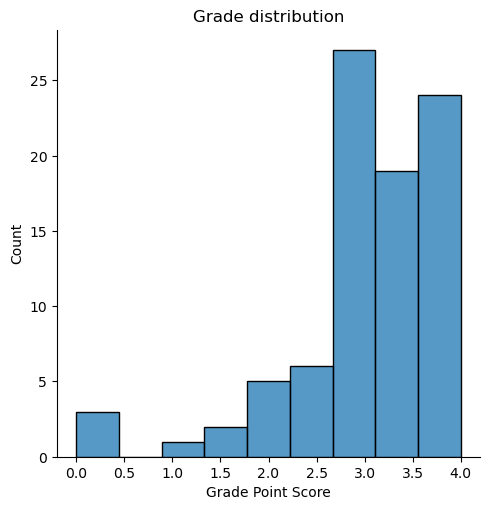

In [31]:
ax = sns.displot(
    data=data, 
    x="Grade Points"
)

plot = ax.set(
    xlabel='Grade Point Score', 
    ylabel='Count', 
    title='Grade distribution'
)

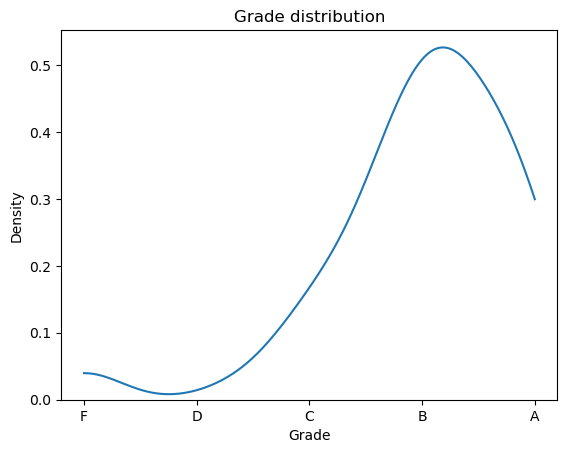

In [32]:
ax = sns.kdeplot(
    data=data, 
    x="Grade Points",
    bw_adjust=1,
    cut=0
)

plot = ax.set(
    xlabel='Grade', 
    ylabel='Density', 
    title='Grade distribution'
)

xticks = ax.set_xticks(range(5), labels=['F','D','C','B','A'])

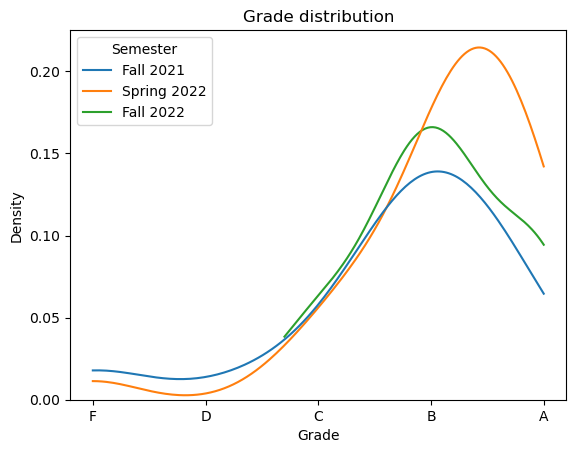

In [33]:
ax = sns.kdeplot(
    data=data, 
    x="Grade Points",
    hue="Semester",
    bw_adjust=1,
    cut=0
)

plot = ax.set(
    xlabel='Grade', 
    ylabel='Density', 
    title='Grade distribution'
)

xticks = ax.set_xticks(range(5), labels=['F','D','C','B','A'])

/tmp/ipykernel_102040/349495079.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.kdeplot(


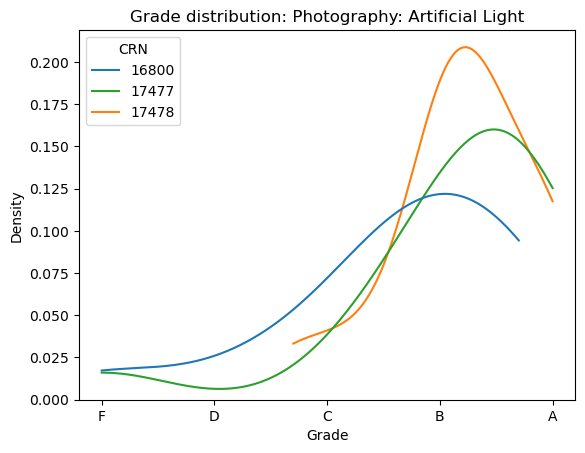

In [34]:
ax = sns.kdeplot(
    data=data[data['Course title'] == 'Photography: Artificial Light'], 
    x="Grade Points",
    hue='CRN',
    palette=palette,
    bw_adjust=1,
    cut=0
)

plot = ax.set(
    xlabel='Grade', 
    ylabel='Density', 
    title='Grade distribution: Photography: Artificial Light'
)

xticks = ax.set_xticks(range(5), labels=['F','D','C','B','A'])

In [35]:
data['Standardized Grade Points'] = (data['Grade Points'] - data['Grade Points'].mean()) / data['Grade Points'].std()
data.describe()

,CRN,Grade Points,Standardized Grade Points
count,88.000000,87.000000,8.700000e+01
mean,17362.375000,2.989655,-3.394475e-16
std,727.304476,0.845925,1.000000e+00
min,15741.000000,0.000000,-3.534184e+00
25%,16801.500000,2.700000,-3.424123e-01
50%,17477.000000,3.000000,1.222901e-02
75%,18092.000000,3.700000,8.397254e-01
max,18295.000000,4.000000,1.194367e+00


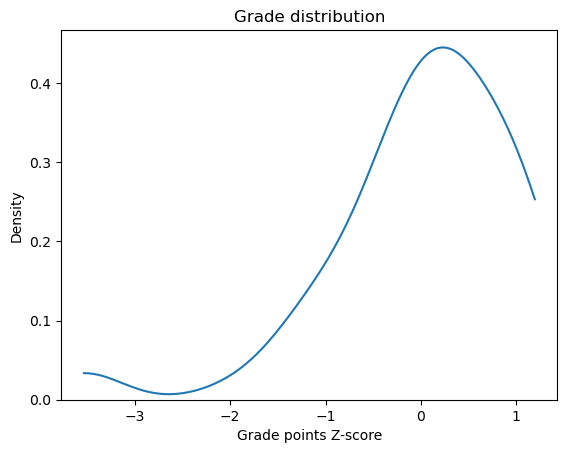

In [36]:
ax = sns.kdeplot(
    data=data, 
    x="Standardized Grade Points",
    bw_adjust=1,
    cut=0
)

plot = ax.set(
    xlabel='Grade points Z-score', 
    ylabel='Density', 
    title='Grade distribution'
)

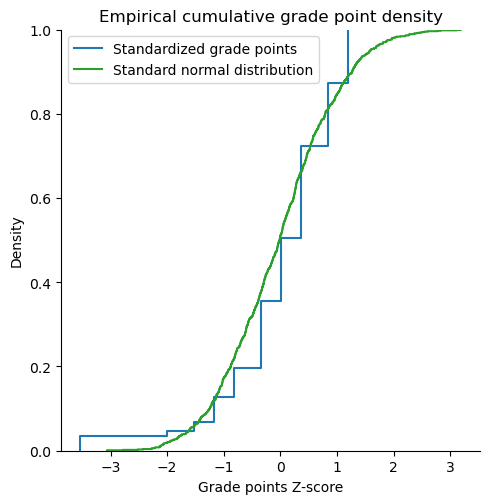

In [43]:
ax = sns.displot(
    data=data, 
    x="Standardized Grade Points",
    kind='ecdf'
)

x = np.random.randn(1000)

sns.ecdfplot(x, color='tab:green')

plt.legend(labels=['Standardized grade points', 'Standard normal distribution'])

plot = ax.set(
    xlabel='Grade points Z-score', 
    ylabel='Density', 
    title='Empirical cumulative grade point density'
)

In [47]:
stats.kstest(list(data['Standardized Grade Points']), np.random.randn(1000))

KstestResult(statistic=0.18881818181818183, pvalue=0.005328227535321211)